### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [9]:
df=df[df['Emotion']!='surprise']

In [10]:
df.head(10)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...
10,anger,The bull tossed the effigy out of their hands ...
11,sadness,People hide their behind a #fake smile.
12,joy,"For once in his life , Leopold must have been ..."


In [11]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy        11045
sadness     6722
fear        5410
anger       4297
neutral     2254
disgust      856
shame        146
Name: count, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

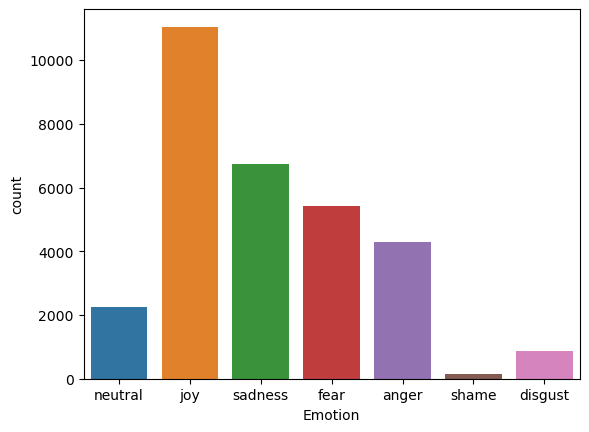

In [12]:
# Plot
sns.countplot(x='Emotion',data=df)

In [13]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [15]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [16]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34786,joy,Tuesday woken up to Oscar and Cornet practice X,Tuesday woken Oscar Cornet practice X
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [17]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [18]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [19]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [20]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\shital\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6711140036880355

In [27]:
# Make A Prediction
ex1 = "you are looking so nice"

In [28]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [29]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.10738844, 0.00437928, 0.07107347, 0.50747638, 0.06455474,
        0.2438229 , 0.00130479]])

In [30]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame'],
      dtype=object)

In [31]:
# Save Model & Pipeline
import joblib
pipeline_file = open("Text_Emotion_analysis.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()